# E3 Prelab Q1-2 Part 1

In Q1 you are asked to compare the titration data obtained from E2 to the model of a titration that you developed in the E2 prelab. You are then asked to modify some parameters in the model to best fit the experimental data. 

The model is an expression for the number of Ce(IV) added as  function of potential. A comparison will require you to convert steps of the sringe pump to the number of Ce(IV) added. This first part shows an example of a similar conversion to grams of the Ce(IV)-containing solution added based off the 'Fine Titration Data.txt' uploaded to canvas. 

## Import Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import titration data 

Import titration data into a pandas dataframe. For the example dataset, the delimiters are commas and the first 4 rows contains details of the calibration that you will need to convert steps to number of Ce(IV) added.  We skip those rows in the first step. The format of your titration data may differ.  

In [2]:
titration_data = pd.read_csv('Fine Titration Data.txt', skiprows = 4, sep = ',')
print(titration_data)

    step  mean potential   std dev
0      0        0.375151  0.000299
1    100        0.382833  0.000312
2    200        0.394100  0.000305
3    300        0.402321  0.000345
4    400        0.408935  0.000296
5    500        0.415232  0.000310
6    600        0.419997  0.000306
7    700        0.424276  0.000301
8    800        0.428117  0.000317
9    900        0.432301  0.000302
10  1100        0.438227  0.000319
11  1300        0.443456  0.000329
12  1500        0.448138  0.000326
13  2000        0.458960  0.000313
14  2500        0.468684  0.000318
15  3000        0.477850  0.000285
16  3500        0.487472  0.000320
17  4000        0.498617  0.000302
18  4200        0.503372  0.000318
19  4400        0.508943  0.000321
20  4600        0.515254  0.000335
21  4800        0.522594  0.000297
22  5000        0.532252  0.000307
23  5200        0.546238  0.000277
24  5400        0.577621  0.000310
25  5500        0.740865  0.003687
26  5550        1.090459  0.000386
27  5600        1.11

# Read calibration data

Here we simply want to see the pump calibration values. In the example file the calibration data are in the first four rows of the file. Your own calibration data might be located elsewhere e.g. in your lab notebook. 

In [3]:
# read first 4 lines of titration data which contains the calibration info
calibration_data = pd.read_csv('Fine Titration Data.txt', nrows = 4, header = None, sep = ':')
# create dictionary containing calibration information
calibration_dict = dict(zip(calibration_data[0], calibration_data[1]))
calibration_dict

{'Mass of FeSO4 Solution Added': ' 0.500 g',
 'Mass of (NH4)2Ce(NO4)6': ' 0.990 g',
 'Mass of Cerium solution': ' 20.030 g ',
 'Pump Calibration of Ce Solution': ' 6000 Steps = 1.355 g '}

# Convert steps to grams of solution added

Use the calibration data to convert the number of steps of Ce(IV) added in the titration to grams of the Ce(IV)-containing solution added. In the example file, 1 step correspoonds to 1.355/6000 grams of Ce(IV) solution 

In [78]:
step = titration_data['step']
number_steps_in_calibration = 6000
mass_of_calibration_in_g = 1.355

# convert steps to grams. 
mass_solution_added_in_g = (step / number_steps_in_calibration) * mass_of_calibration_in_g
mass_solution_added_in_g

0     0.000000
1     0.022583
2     0.045167
3     0.067750
4     0.090333
5     0.112917
6     0.135500
7     0.158083
8     0.180667
9     0.203250
10    0.248417
11    0.293583
12    0.338750
13    0.451667
14    0.564583
15    0.677500
16    0.790417
17    0.903333
18    0.948500
19    0.993667
20    1.038833
21    1.084000
22    1.129167
23    1.174333
24    1.219500
25    1.242083
26    1.253375
27    1.264667
28    1.275958
29    1.298542
30    1.321125
31    1.343708
32    1.388875
33    1.434042
34    1.479208
35    1.524375
36    1.637292
37    1.750208
38    1.863125
39    2.088958
Name: step, dtype: float64

## Plot data

After you finish the conversion of steps to number of Ce(IV) added, adjust the code below to plot your converted titration data.

Text(0, 0.5, 'Potential / V')

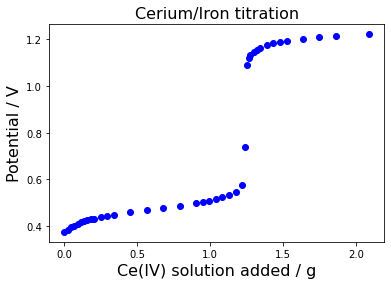

In [79]:
# plot data
plt.errorbar(x = mass_solution_added_in_g , y = titration_data['mean potential'], 
             yerr = titration_data['std dev'], fmt='bo')

plt.title('Cerium/Iron titration', fontsize = 16)
plt.xlabel('Ce(IV) solution added / g', fontsize = 16)
plt.ylabel('Potential / V', fontsize = 16)

# # E3 Prelab Q1-2 Part 2

In the second part of Q1, you will overlay the titration data with the derived titration curve (model) and estimate the redox potentials required for the model to match the experimental data. This is a visual way to estimate the parameters in the model. You are welcome to go further and use nonlinear fitting routines to further refine the parameters, but you do not need to do so. 

The example below shows how you can visually model a dataset. Here the data is compared to the function y = a sin(bx + c). Change a, b and c to visually match the model to the synthetic dataset. 

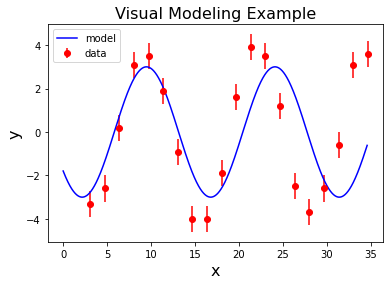

In [80]:
# Example: Compare a sinusodal model to some data. 
def model(x_model, a, b, c):
    return a*np.sin(b*x_model + c)

# Data 
x_data = np.array([ 3.1, 4.8, 6.4, 8.1, 9.8, 11.4, 13.1, 14.7, 16.4, 18.0, 
                  19.7, 21.3, 23.0, 24.6, 26.3, 27.9, 29.6, 31.3, 32.9, 34.6])
y_data = np.array([-3.3, -2.6, 0.2, 3.1, 3.5, 1.9, -0.9, -4.0, -4.0, -1.9, 
                  1.6, 3.9, 3.5, 1.2, -2.5, -3.7, -2.6, -0.6, 3.1, 3.6])

# Model. Change the a, b, c model parameters here. 
x_model = np.linspace(0, 11*np.pi, 10000)
y_model = model(x_model, a = 3, b = 0.43, c = -2.5)

# Plot data overlaid with model
plt.errorbar(x = x_data , y = y_data, yerr = .6, label = 'data', fmt='ro')
plt.plot(x_model , y_model, label = 'model', color = 'blue')
plt.title('Visual Modeling Example', fontsize = 16)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.legend()
plt.show()